
<img width= "300" src="https://cdn.discordapp.com/attachments/392490318798389248/945695517004951633/jeanettes_fireart.png" alt="US Fires Logo">

# Analyzing US Wildfires: Final Report

### by Lori Ainslie, Jeanette Schulz, Kristine Cabanela, and Sophia Stewart 
### Last Updated: 23 February 2022

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Group-made functions
from wrangle import *

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)


---
# Acquire
---

# Information on where we found the data

In [2]:
# Acquiring the data from our wrangle
df = acquire_fires()
df.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005 0:00,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005 0:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004 0:00,133,845.0,Natural,Natural,NaN,5/12/2004 0:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004 0:00,152,1921.0,Human,Debris and open burning,NaN,5/31/2004 0:00,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004 0:00,180,1600.0,Natural,Natural,NaN,7/3/2004 0:00,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County


---
# Prepare
---

We started by preparing the data as a team. All decisions made were as a group to ensure our wrangled data would benefit each of our future exploration needs.

We started by dropped columns with large amount of null values:

- LOCAL_FIRE_REPORT_ID
- LOCAL_INCIDENT_ID
- FIRE_CODE
- FIRE_NAME
- ICS_209_PLUS_INCIDENT_JOIN_ID
- ICS_209_PLUS_COMPLEX_JOIN_ID
- MTBS_ID
- MTBS_FIRE_NAME
- COMPLEX_NAME
- DISCOVERY_TIME
- NWCG_CAUSE_AGE_CATEGORY
- CONT_TIME
- COUNTY
- FIPS_CODE
- FIPS_NAME

Next, this data set came with a lot of columns that had additional information. This included columns such as the `NWCG_REPORTING_AGENCY` (superfluous information) and `DISCOVERY_DOY` (uneccesarry if we keep `DISCOVERY_DATE`). Thus, we dropped these additonal columns as follows:  

- FOD_ID
- FPA_ID
- SOURCE_SYSTEM_TYPE
- SOURCE_SYSTEM
- NWCG_REPORTING_AGENCY
- NWCG_REPORTING_UNIT_ID
- NWCG_REPORTING_UNIT_NAME
- SOURCE_REPORTING_UNIT
- SOURCE_REPORTING_UNIT_NAME
- FIRE_SIZE_CLASS
- NWCG_CAUSE_CLASSIFICATION
- CONT_DOY
- DISCOVERY_DOY
- OWNER_DESCR

Now that we had the columns we wanted to keep, it was time to make sure they were the correct dtype and format. We made sure `DISCOVERY_DATE` and `CONT_DATE` were datetime dtypes. In addition, we renamed `nwcg_general_cause` and `cont_date` to `general_cause` and `containment_date`. Then, finally, we changed all the names of the columns to be lowercase so they would be easier to code.   
Here is what our cleaned dataframe looked like:

In [3]:
df = wrangle_fires()
df.head()

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris and open burning,2004-05-31,0.10,38.984167,-120.735556,CA
3,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.913333,CA
4,2004,2004-06-28,Natural,2004-07-03,0.10,38.559167,-119.933056,CA


---
# Explore
---

In [4]:
# Creating a time-series dataframe
time_df = df
time_df = time_df.set_index('discovery_date').sort_index()
time_df.head()

,fire_year,general_cause,containment_date,fire_size,latitude,longitude,state
discovery_date,,,,,,,
1992-01-01,1992,Smoking,1992-01-01,0.07,32.201000,-82.498700,GA
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.50,41.196201,-105.641502,WY
1992-01-01,1992,Missing data/not specified/undetermined,NaT,0.25,41.063980,-109.302200,WY
1992-01-01,1992,Missing data/not specified/undetermined,NaT,8.00,41.734581,-104.197502,WY
1992-01-01,1992,Missing data/not specified/undetermined,NaT,7.00,41.734581,-104.409698,WY


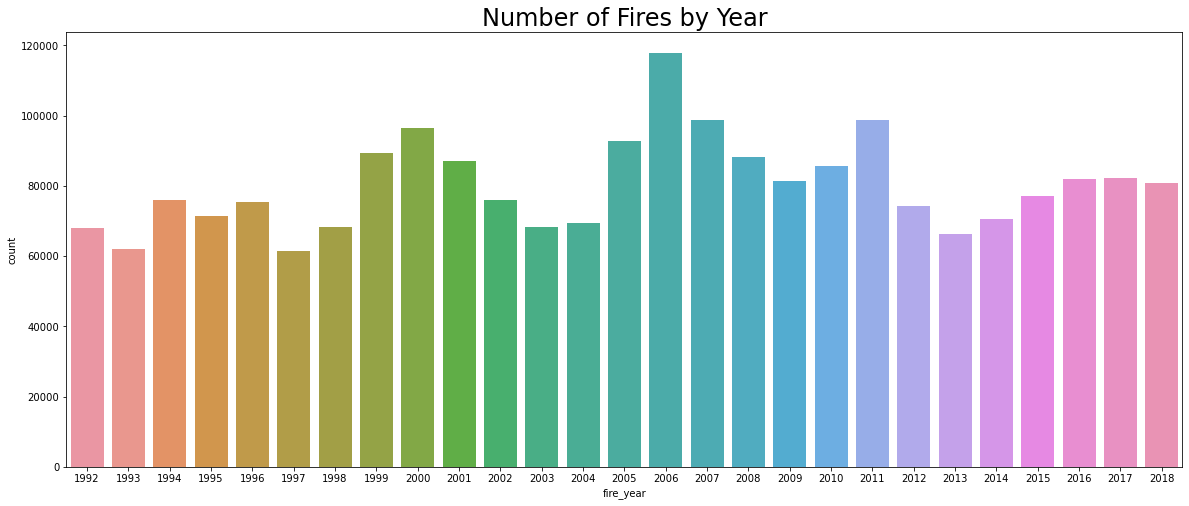

In [5]:
# plot number of fires by year
plt.figure(figsize = (20,8))
sns.countplot(data= df, x= 'fire_year')
plt.legend([],[], frameon=False)
plt.title('Number of Fires by Year', fontdict={'fontsize': 24});


### The average number of wildfires appears to be just a bit higher in recent years than it was in the early 1990s. The number is lower than it was at the beginning of the 21st century and in 2006 which went on record as one of the hottest years in the U.S.

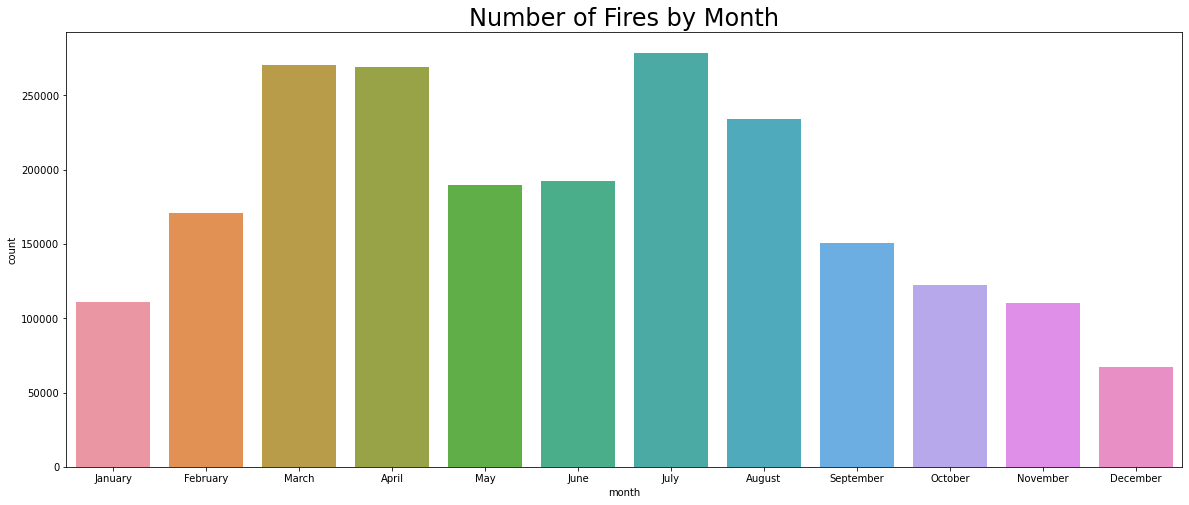

In [6]:
# plot number of fires by month
time_df['month'] = time_df.index.month_name()

plt.figure(figsize = (20,8))
sns.countplot(data= time_df, x= 'month')
plt.legend([],[], frameon=False)
plt.title('Number of Fires by Month', fontdict={'fontsize': 24});

### As the hottest months of the year, July and August, have some of the highest numbers of wildfires. It is a little surprising to see that March and April also have more wildfires than other months. 

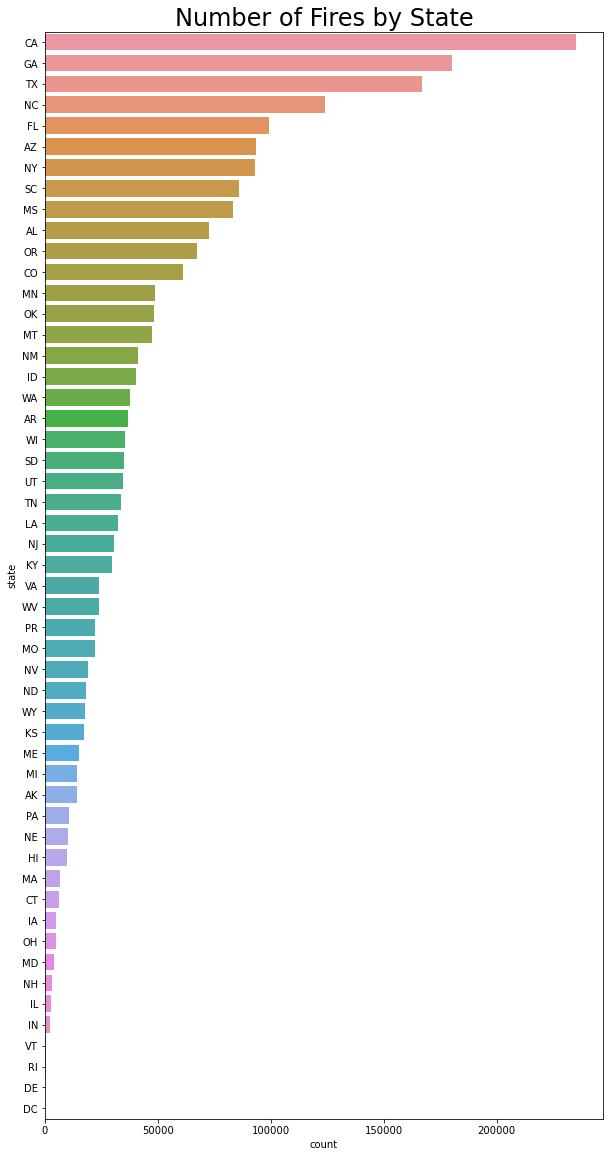

In [7]:
# plot number of fires by state
plt.figure(figsize=(10,20))
sns.countplot(data= df, y= 'state', order= df.state.value_counts().index)
plt.title('Number of Fires by State', fontdict={'fontsize': 24});

### Not surprisingly, this chart shows that California has the highest number of wildfires. It is followed by Georgia and Texas and many other southern states. The states with the least amount of wildfires seem to be primarily in the northeastern part of the U.S.

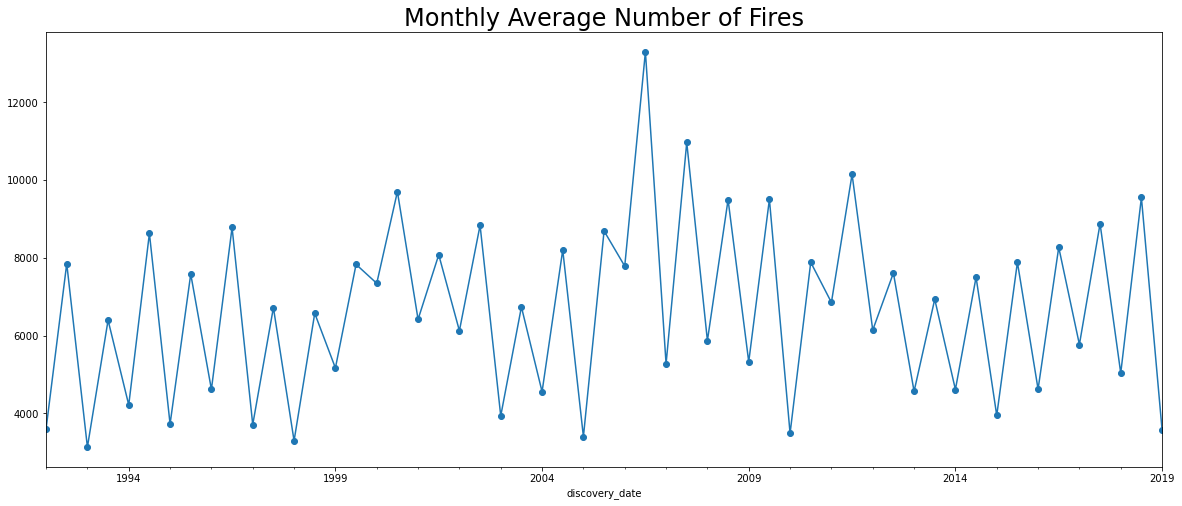

In [8]:
# plot number of fires per 1-month period over the years
num_fires_by_month = time_df.resample('M').fire_year.count()

plt.figure(figsize = (20,8))
num_fires_by_month.resample('6M').mean().plot(marker='o')
plt.title('Monthly Average Number of Fires', fontdict={'fontsize': 24});

### When looking at the average number of fires by month, there is no clear trend outside of the 2005 - 2006 timeframe which had experienced a significant number of wildfires. 

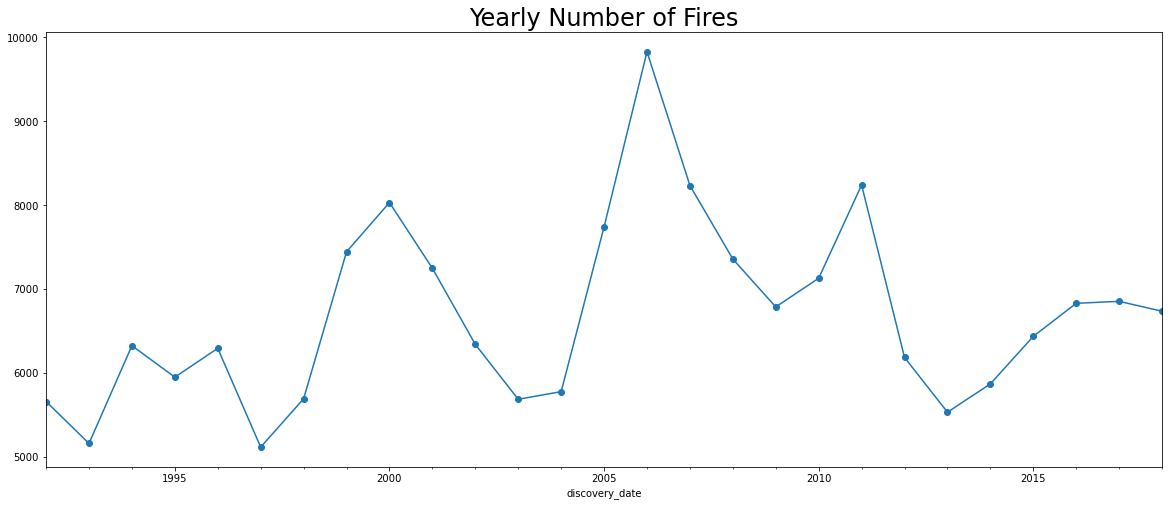

In [9]:
# plot number of fires per year over the years
plt.figure(figsize = (20,8))
num_fires_by_month.resample('Y').mean().plot(marker='o')
plt.title('Yearly Number of Fires', fontdict={'fontsize': 24});

### In this graph we see a downward trend in the number of fires since 2005 - 2006 timeframe which had experienced a significant number of wildfires.

In [10]:
# Resample by month to get the date that had the most acres burned and the total number of acres burned that month
size_fires_by_month = time_df.resample('M').fire_size.sum()
print(size_fires_by_month.idxmax())
print(size_fires_by_month.max())

2015-06-30 00:00:00
5248481.509999639


### The month with most acreage burned from 1992 - 2018 was June 2015 with a total of 5.2M acres burned.

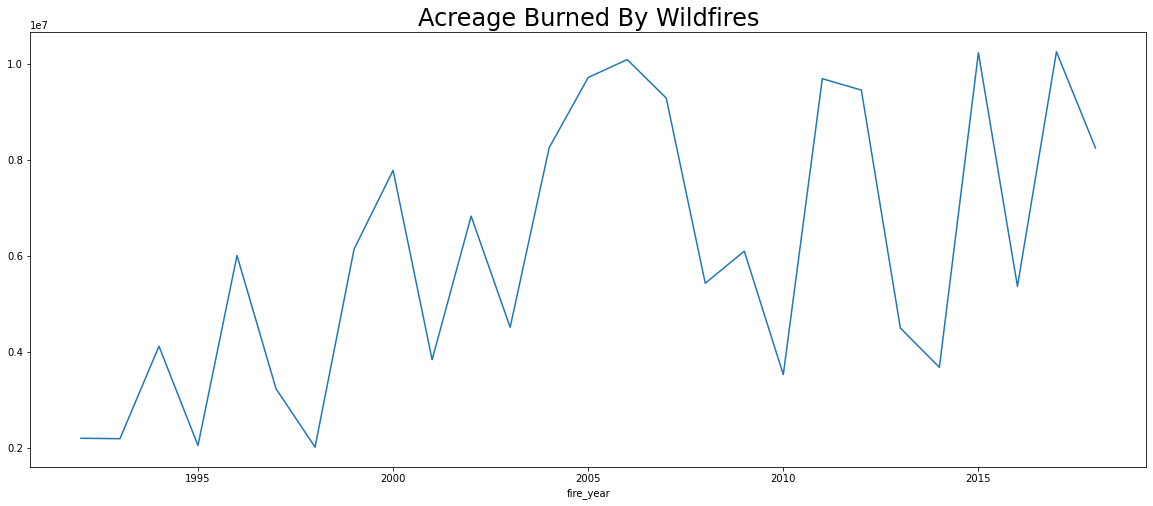

In [11]:
# plot acreage burned by wildfires over the years
plt.figure(figsize = (20,8))
df.groupby('fire_year').fire_size.sum().plot()
plt.title('Acreage Burned By Wildfires', fontdict={'fontsize': 24});

### Although we have identified a downward trend in the number of wildfires in recent years, the total acreage burned by wildfires shows an upward trend since 1992. This tells us that the wildfires that do occur may be more difficult to contain and are more disastrous. 

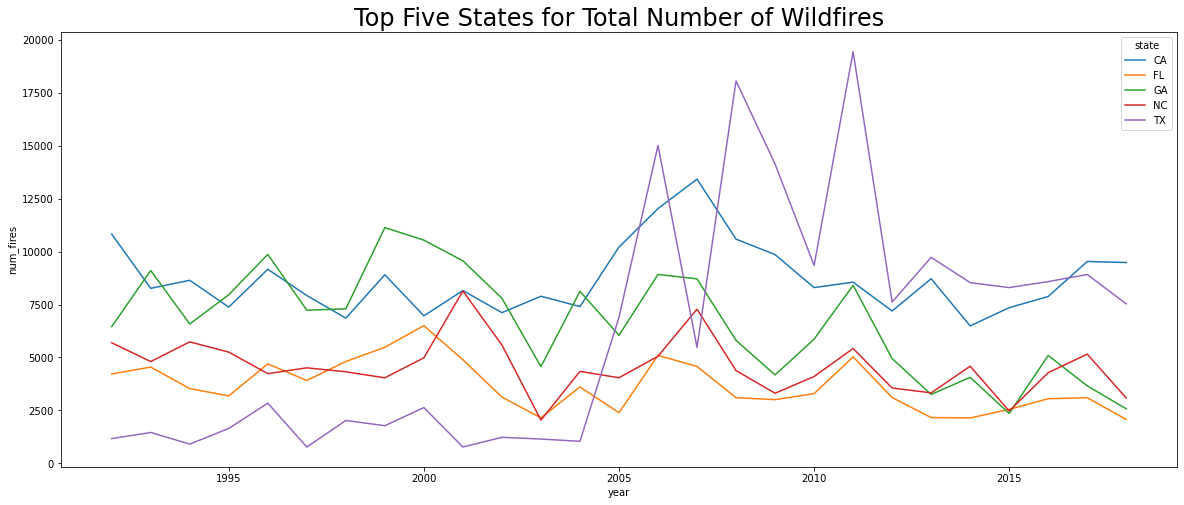

In [12]:
# Make a list of top five states for number of wildfires
top_five_wildfire_states = df.state.value_counts().head(5).index.to_list()

# Create the dataframe for the chart
num_fires_by_year = time_df[time_df.state.isin(top_five_wildfire_states)]\
.groupby(['fire_year', 'state']).count().reset_index()\
.iloc[:, 0:3].rename(columns={'general_cause':'num_fires', 'fire_year':'year'})

# Plot findings
plt.figure(figsize = (20,8))
sns.lineplot(data=num_fires_by_year, x='year', y='num_fires', hue='state')
plt.title('Top Five States for Total Number of Wildfires', fontdict={'fontsize': 24});

### The number of wildfires for the states with the most wildfires has been slightly decreasing for the last few years. Texas, in spite of this decrease for the last few years, has still seen quite the upward trend since 1992 with roughly three times as many fires in recent years than recorded in the early 1990s. Additionally, it had a few significant years for wildfires from 2005 - 2011.

In [13]:
# create a year column and get value counts for the top five causes by year
time_df['year'] = time_df.index.year
top_causes_of_wildfires = time_df.general_cause.value_counts().head()

# create a new dataframe that groups by year and gets a count by year of the top 4 causes (exclude unknown/not specified) for wildfires
num_causes_by_year = time_df[time_df.general_cause.isin(top_causes_of_wildfires[1:].index.to_list())]\
.groupby(['year', 'general_cause']).count().reset_index().iloc[:, 0:3]\
.rename(columns={'fire_year':'num_occurrences'})
num_causes_by_year


,year,general_cause,num_occurrences
0,1992,Arson/incendiarism,11250
1,1992,Debris and open burning,12792
2,1992,Equipment and vehicle use,5637
3,1992,Natural,12576
4,1993,Arson/incendiarism,11036
...,...,...,...
103,2017,Natural,8752
104,2018,Arson/incendiarism,6019
105,2018,Debris and open burning,18674
106,2018,Equipment and vehicle use,7385


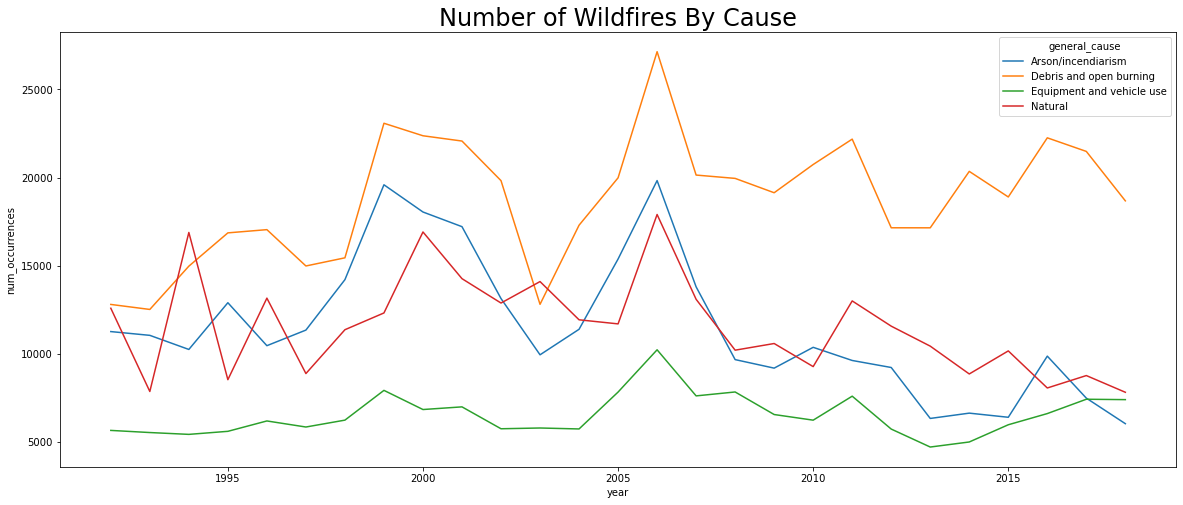

In [14]:
# Lori
# plot trends over the years for the top four causes of wildfires
plt.figure(figsize = (20,8))
sns.lineplot(data=num_causes_by_year, x='year', y='num_occurrences', hue='general_cause')
plt.title('Number of Wildfires By Cause', fontdict={'fontsize': 24});


### This graph shows that the number of wildfires caused by debris and open burning has been increasing since 1992. Other than the number of fires caused by equipment and vehicle use, which has stayed pretty steady over the years, the number of fires for the other top two causes, arson/incendiarism and natural causes, have decreased.

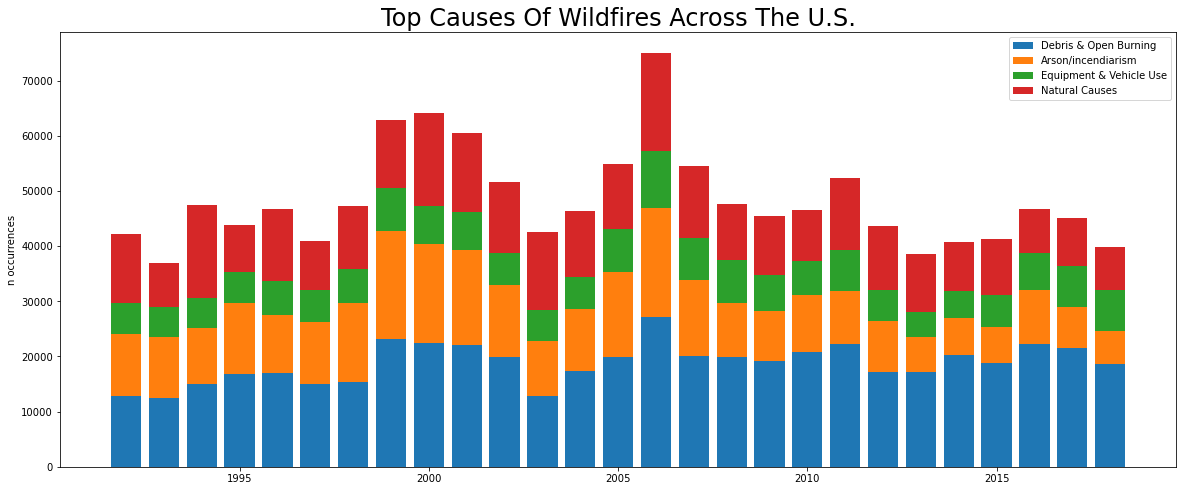

In [15]:
# Lori
# separate each of the top four causes into their own dataframe
natural = num_causes_by_year[num_causes_by_year.general_cause == "Natural"]
arson = num_causes_by_year[num_causes_by_year.general_cause == "Arson/incendiarism"]
debris = num_causes_by_year[num_causes_by_year.general_cause == "Debris and open burning"]
equipment = num_causes_by_year[num_causes_by_year.general_cause == "Equipment and vehicle use"]

# set the year column as the index for each of the dataframes
natural = natural.set_index("year")
arson = arson.set_index("year")
equipment = equipment.set_index("year")
debris = debris.set_index("year")

# create the subplots
fig, ax = plt.subplots(figsize = (20,8))

labels = arson.index
# plot the number of occurrences for each cause by year
ax.bar(labels, debris.num_occurrences, label="Debris & Open Burning")
ax.bar(labels, arson.num_occurrences, label="Arson/incendiarism", bottom=debris.num_occurrences)
ax.bar(labels, equipment.num_occurrences, label="Equipment & Vehicle Use", bottom=debris.num_occurrences + arson.num_occurrences)
ax.bar(labels, natural.num_occurrences, label="Natural Causes", bottom=debris.num_occurrences + arson.num_occurrences + equipment.num_occurrences)

ax.legend()
ax.set_ylabel("n occurrences")
ax.set_title("Top Causes Of Wildfires Across The U.S.", fontdict={'fontsize': 24});


### We can see a slight increase in number of wildfires caused by open burning and a slight decrease in the number caused by arson/incendiarism. The number of fires caused by equipment and vehicle use has stayed pretty steady while the number caused by natural causes appears to have slightly decreased.

#### Number of Months in a year, that had an average days_fire_existed greater than zero
- 1992: 1
- 1993: 0 
- 1994: 3
- 1995: 1
- 1996: 3
- 1997: 1
- 1998: 2
- 1999: 3
- 2000: 3
- 2001: 2
- 2002: 5
- 2003: 4
- 2004: 4
- 2005: 7
- 2006: 6
- 2007: 3
- 2008: 9
- 2009: 6
- 2010: 5
- 2011: 4
- 2012: 7
- 2013: 6
- 2014: 5
- 2015: 4
- 2016: 4
- 2017: 6
- 2018: 6

### While this could certainly be explained better as a chart, this list of number represents an increase in the length of time it takes to contain a fire. In 1992, the length of time it took to contain a fire was averaged. This data shows that in 1992, most fires were contained the same day they were discovered (represeted as an average of 0 days). There was only one month out of 1992 that had an average above this, wherein the average was 1 day. This means for that month, it took more than a day to contain a fire (on average). Notice in the list, this is what the '1' represents for 1992.
### Now as you move down the list through the years, the number of months in a year with an average above 0 days increases. By 2005, there is an month with an average of 10 days. This means, in that month, the average time it took to contain a fire was 10 days!
### The takeaway from this list, is that fires are taking much longer for firemen to contain when comparing 1992 to 2018. In 1992, there was only one month of that year that had a fire containment average above zero days. By 2018, we see there are six months of that year that had a fire containment average above zero days.  

In [16]:
# Jeanette
# Dropping data that has nulls in containment_date
clean_df = df[df.containment_date.isnull() == False]

# Creating a column to see how many days before a fire was contained
clean_df['days_fire_existed'] = df.containment_date - df.discovery_date

# 2005 had fires that took much longer to contain. Idaho shows some fires lasting YEARS!
clean_df[(clean_df.discovery_date == '2005-08') & (clean_df.days_fire_existed > '29 days')]

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,days_fire_existed
3585,2005,2005-08-01,Natural,2005-10-31,60.0,45.582778,-114.847500,ID,91 days
3751,2005,2005-08-01,Natural,2005-10-31,7244.4,45.730278,-114.706667,ID,91 days
3998,2005,2005-08-01,Natural,2005-09-30,559.0,46.273056,-115.027778,ID,60 days
4004,2005,2005-08-01,Natural,2005-09-30,394.0,45.990000,-114.703333,ID,60 days
4006,2005,2005-08-01,Natural,2005-09-17,0.1,46.025000,-114.877222,ID,47 days
4516,2005,2005-08-01,Natural,2005-10-30,0.5,45.647778,-114.613333,ID,90 days
4522,2005,2005-08-01,Natural,2005-10-31,0.1,45.641667,-114.656944,ID,91 days
4554,2005,2005-08-01,Natural,2005-10-31,1086.0,45.599167,-114.682500,ID,91 days
4559,2005,2005-08-01,Natural,2005-10-31,60.9,45.811944,-114.804167,ID,91 days
5602,2005,2005-08-01,Natural,2005-11-14,5.0,33.239722,-107.853333,NM,105 days


### While investigating a certain date, we found that there were some fires that lasted well over a year. It's difficult to say why these fires were considered uncontained for so long, and yet burned very little acres. There is a chance these Idaho fires represent the coal mines that caught on fire and were left to burn, however there is no way to prove these fires represent those fires or a different set of fires entirely. 

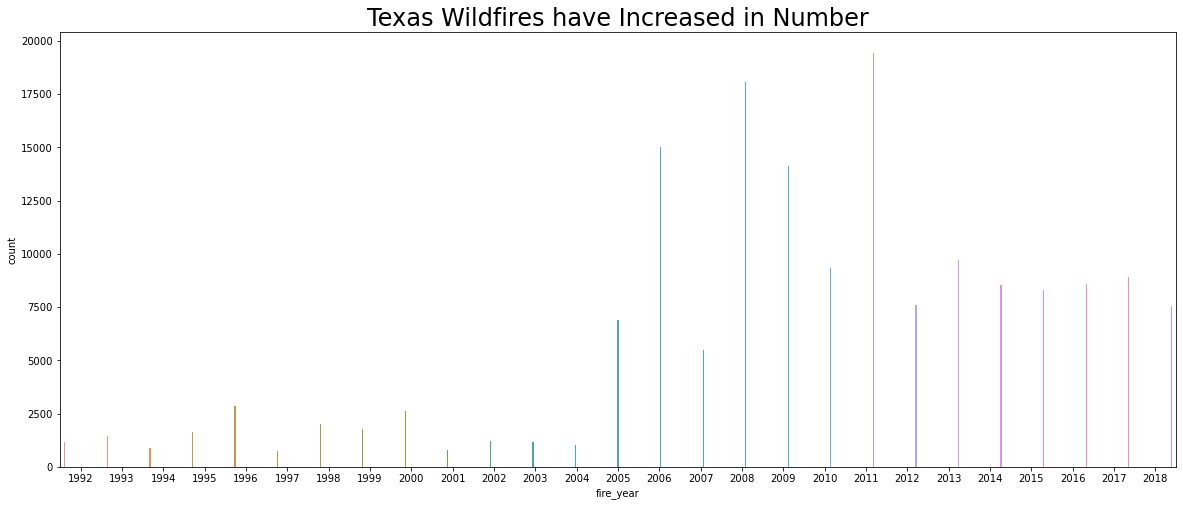

In [17]:
# Jeanette
# Making a texas dataframe
texas = df[df.state == 'TX']

# Let's look at how many fires Texas has had over the years
plt.figure(figsize = (20,8))
sns.countplot(data= texas , x= 'fire_year', hue='fire_year'  )
plt.legend([],[], frameon=False)
plt.title('Texas Wildfires have Increased in Number', fontdict={'fontsize': 24});

### The chart above shows that the number of fires in Texas was clearly less before 2005. There is a significant increase in the fires between 2005 and 2011. After 2011, it seems the number of fires in a year decreases, but we don't see the smaller numbers as seen before 2005. The "new normal" of fires per year in Texas seems to be between 7,500 and 10,000. This could be a result of climate change getting worse. Unfortunately, it could also be a result of poor reporting in Texas before the year 2005.

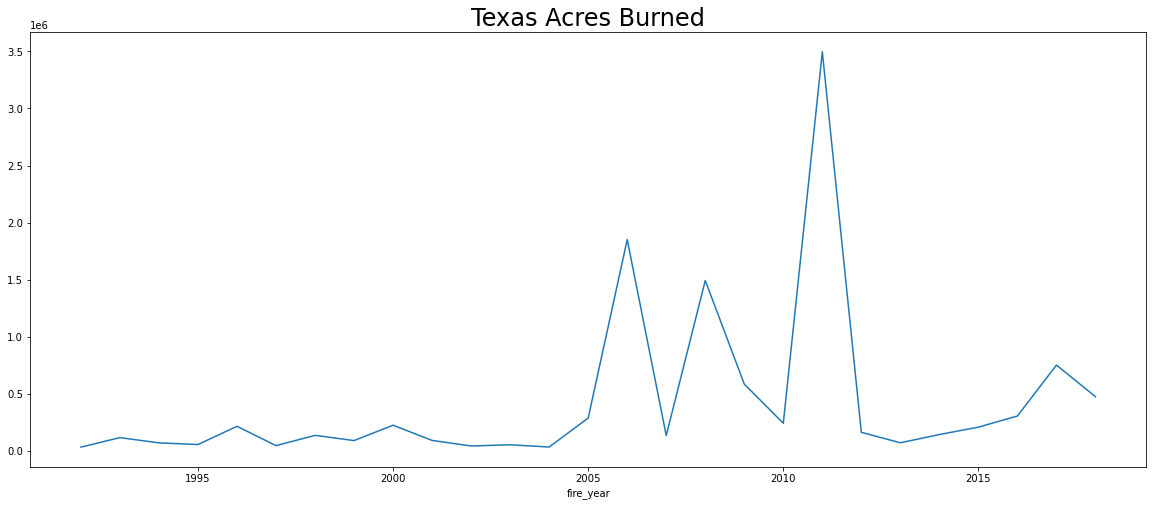

In [18]:
# Jeanette
# Total Acres burned in Texas per year
plt.figure(figsize = (20,8))
texas.groupby('fire_year').fire_size.sum().plot()
plt.title('Texas Acres Burned', fontdict={'fontsize': 24});

### This is another visualization for Texas fires, showing the number of acres burned. When compared with the visual above showing the number of fires, it's no surprise to see that the most acres burned was between 2005 and 2012. While the number of fires after 2012 is higher that the 1990's, this chart shows the acres burned is still averaging the same with only a slight increase. Perhaps this means a better response time by firemen? Despite the increase in number of fires, the acres burned seems to be managed. 

In [19]:
# Jeanette
# Are humans the main cause of wildfires?
human_cause = ['Debris and open burning', 
               'Arson/incendiarism', 
               'Equipment and vehicle use', 
               'Recreation and ceremony', 
               'Misuse of fire by a minor', 
               'Smoking', 
               'Power generation/transmission/distribution', 
               'Fireworks', 
               'Railroad operations and maintenance', 
               'Firearms and explosives use']                            
                                       

other_cause = ['Missing data/not specified/undetermined', 
               'Natural', 
               'Other causes']
human_fires = 0
for cause in human_cause:
    human_fires += clean_df[clean_df.general_cause == cause ].shape[0]


other_fires = 0
for cause in other_cause:
    other_fires += clean_df[clean_df.general_cause == cause ].shape[0]

print('Total Human Caused Fires:', human_fires)
print('Total Other Caused Fires:', other_fires)


Total Human Caused Fires: 748911
Total Other Caused Fires: 563261


### A lot of these fires have thier `general_cause` labled as 'Missing data/not specified/undetermined'. Despite this, the data clearly shows that humans are the main cause of wildfires, not nature. While climate change plays a big role in make these fires worse, the cause of the fire is still in the hands of humans. 

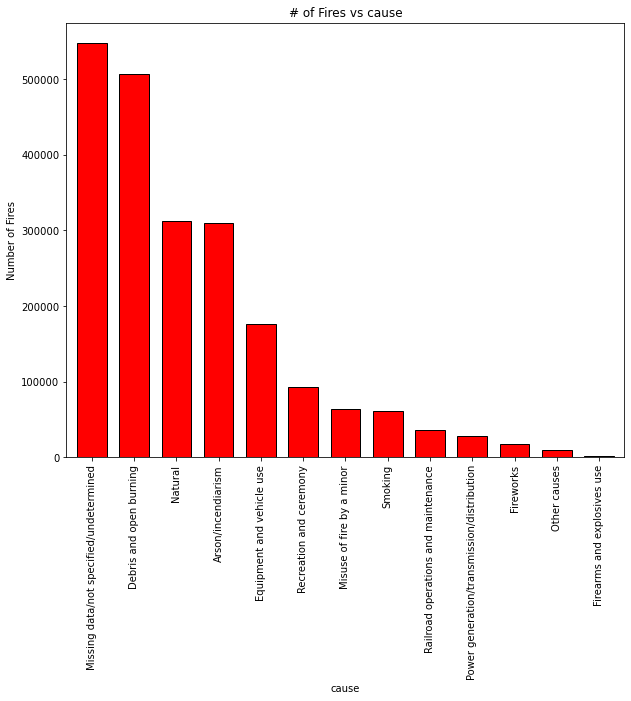

In [20]:
# Kristine
# plotted data for cause of wildfire and # of fires
fig = plt.figure(figsize=(10, 8))
ax = df.general_cause.value_counts().plot.bar(width=.7, ec='black', color='red')
ax.set(title='# of Fires vs cause', ylabel='Number of Fires', xlabel='cause')
plt.savefig("Dist.png")

#### * The chart above shows a visual of the distribution of fires categorized by cause from largest to smallest number of fires in each category. 

- Aside from missing/undertermined causes, Debris and open burning, Natural, Arson are the top three causes for most wildfires.  Human interaction is prevalent however in majority of causes altogether.

*Largest cause of wildfires is "missing data/not specified/undetermined"*

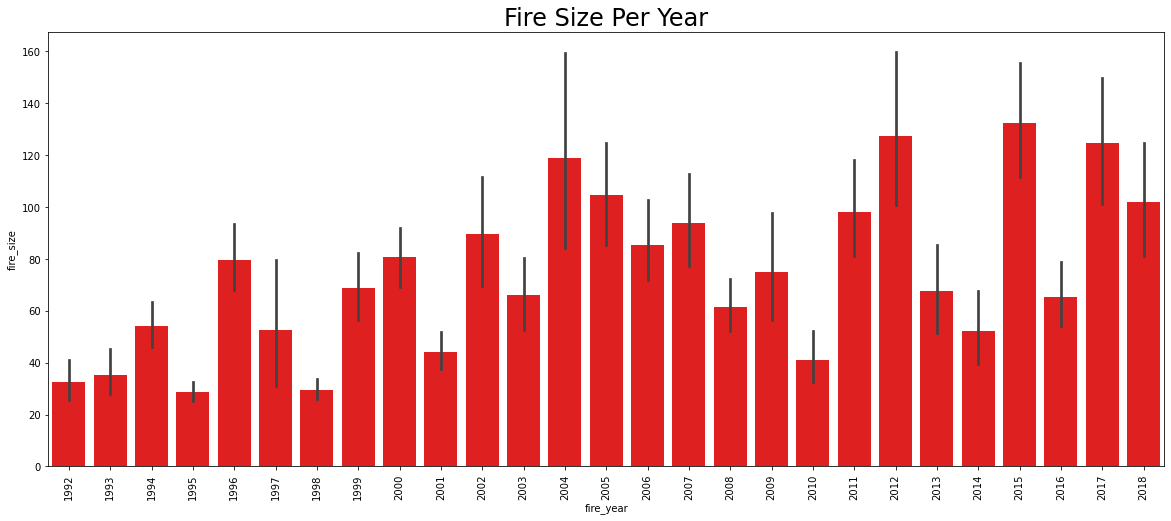

In [21]:
# Kristine
# fire size over span of years
plt.figure(figsize = (20,8))
firesizeyear=sns.barplot(x="fire_year", y="fire_size", data= df ,color='red')
firesizeyear.set_title('Fire Size Per Year', fontdict={'fontsize': 24})
firesizeyear.set_xticklabels(firesizeyear.get_xticklabels(),rotation=90);

#### * The chart above shows a visual of the distribution of fire size over each recorded year*

- Although fire size changes from highs and lows as time progresses, the overall size after 2000 seems to have an upward trajectory.

In [22]:
# add new column for day of the week
df['day_of_week']= df['discovery_date'].dt.day_name()
print(df['day_of_week'])

0          Wednesday
1          Wednesday
2             Monday
3             Monday
4             Monday
             ...    
2166748      Tuesday
2166749     Saturday
2166750       Sunday
2166751     Thursday
2166752       Monday
Name: day_of_week, Length: 2166753, dtype: object


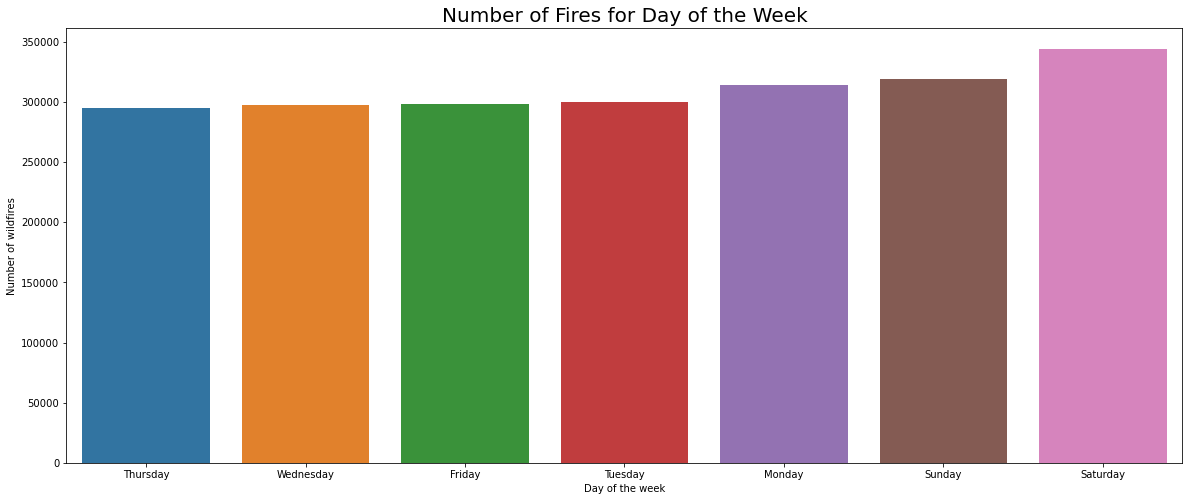

In [23]:
# Kristine
# add new column for day of the week
df['day_of_week']= df['discovery_date'].dt.day_name()

# create dataframe for the count of fires occuring per each day of the week
day_of_week = df.groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')


# plot the number of fires per day of week to visualize
plt.figure(figsize=(20,8))
g = sns.barplot(data = day_of_week, y = 'count', x = 'day_of_week')
plt.xlabel('Day of the week')
plt.ylabel('Number of wildfires')
g.axes.set_title('Number of Fires for Day of the Week',fontsize=20);

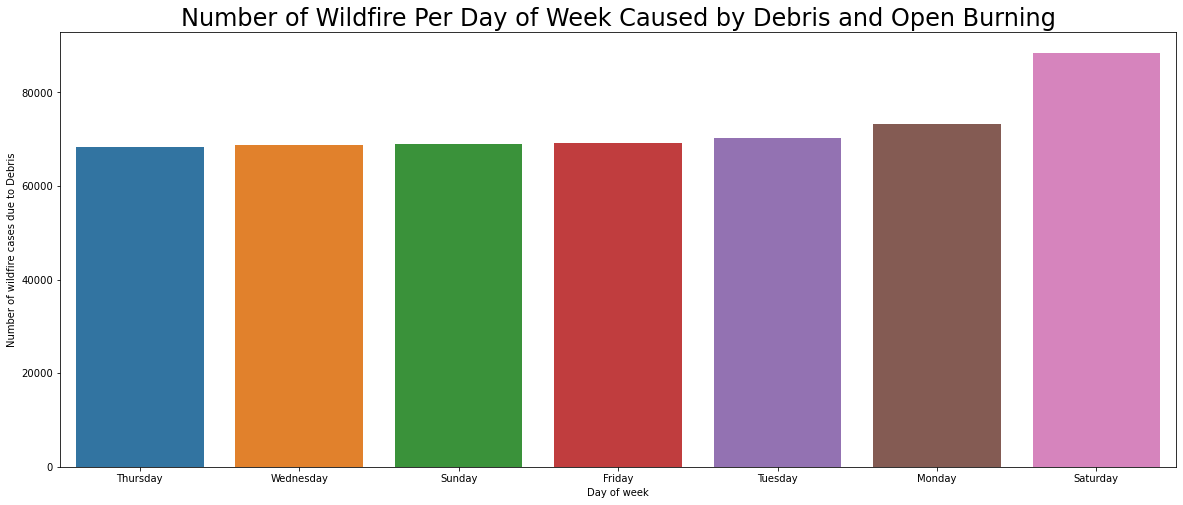

In [24]:
# Kristine
# create dataframe for number of fires during each day of the week 
# that was caused specifically by "debris and open burning"
debris_over_weekday = df[df['general_cause'] == 'Debris and open burning'].groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')

# plot number of fires caused by debris and open burning over days of the week
plt.figure(figsize=(20,8))
g = sns.barplot(data = debris_over_weekday, y = 'count', x = 'day_of_week')
plt.xlabel('Day of week')
plt.ylabel('Number of wildfire cases due to Debris')
g.axes.set_title('Number of Wildfire Per Day of Week Caused by Debris and Open Burning',fontsize=24);

#### * As predicted, the weekends are the most vulnerable days for wildfires to occur. Saturday, Sunday, and Monday have the highest recorded fires. Furthermore, fires caused by Debris and open burning is the most prevalent cause on Saturdays*

In [25]:
# # Sophia
# # plot fires in Texas
# plt.figure(figsize=(15,15))
# sns.scatterplot(x='longitude', y='latitude', data=df[df.state=='TX'], size='fire_size_class', hue='fire_year', palette='flare', alpha=0.5);
# # light to dark, oldest to newest


In [26]:
# Sophia
# create new column
texas['days_uncontrolled'] = texas.containment_date - texas.discovery_date

# look at value counts for uncontrolled windows
texas.days_uncontrolled.value_counts().sort_index()

0 days      23623
1 days       2905
2 days        657
3 days        289
4 days        131
5 days         96
6 days         56
7 days         47
8 days         25
9 days         23
10 days        26
11 days        12
12 days        12
13 days        15
14 days        12
15 days         5
16 days         5
17 days         3
18 days         1
19 days         5
20 days         5
21 days         1
22 days         1
23 days         1
24 days         1
25 days         2
26 days         5
27 days         1
28 days         2
29 days         3
30 days         6
31 days         9
32 days         3
33 days         2
34 days         1
35 days         1
36 days         1
37 days         1
39 days         1
45 days         1
48 days         2
59 days         1
120 days        1
133 days        1
178 days        1
244 days        1
365 days       13
366 days        1
371 days        1
Name: days_uncontrolled, dtype: int64

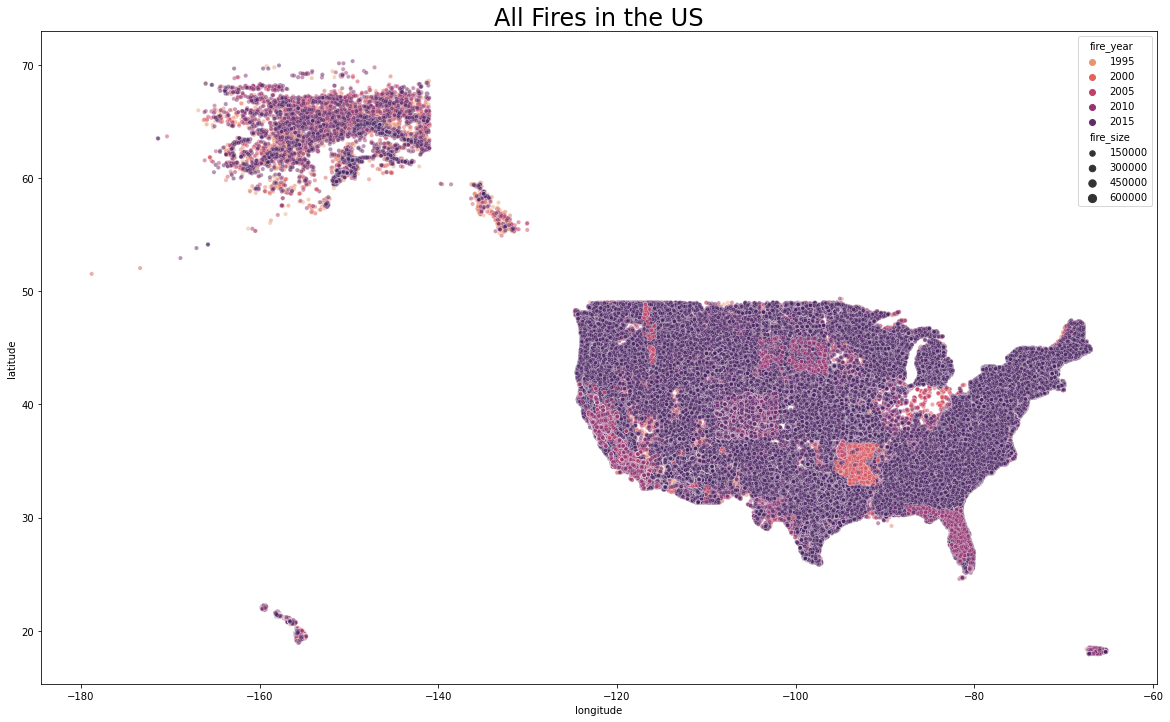

In [27]:
# Sophia
# plot fires across us
plt.figure(figsize=(20,12))
sns.scatterplot(x='longitude', y='latitude', data= df, size='fire_size', hue='fire_year', palette='flare', alpha=0.5);
plt.title('All Fires in the US', fontdict={'fontsize': 24});


In [28]:
# Sophia
# print max and min for num fires/year
for year in list(range(1992, 2019)):
    print(year)
    print('Fewest fires:', df[df.fire_year == year].groupby('state').fire_size.count().idxmin(), df[df.fire_year == year].groupby('state').fire_size.count().min())
    print('Most fires:',df[df.fire_year == year].groupby('state').fire_size.count().idxmax(), df[df.fire_year == year].groupby('state').fire_size.count().max())
    print()
    

1992
Fewest fires: VT 1
Most fires: CA 10831

1993
Fewest fires: DE 1
Most fires: GA 9111

1994
Fewest fires: MA 1
Most fires: CA 8649

1995
Fewest fires: VT 2
Most fires: GA 7966

1996
Fewest fires: PR 3
Most fires: GA 9872

1997
Fewest fires: VT 2
Most fires: CA 7928

1998
Fewest fires: MA 1
Most fires: GA 7301

1999
Fewest fires: DE 2
Most fires: GA 11138

2000
Fewest fires: DE 1
Most fires: GA 10545

2001
Fewest fires: DC 1
Most fires: GA 9568

2002
Fewest fires: DC 1
Most fires: GA 7801

2003
Fewest fires: MD 5
Most fires: CA 7894

2004
Fewest fires: VT 16
Most fires: GA 8127

2005
Fewest fires: DC 2
Most fires: CA 10219

2006
Fewest fires: DC 3
Most fires: TX 15019

2007
Fewest fires: DC 1
Most fires: CA 13428

2008
Fewest fires: DC 1
Most fires: TX 18068

2009
Fewest fires: DC 1
Most fires: TX 14142

2010
Fewest fires: DC 1
Most fires: TX 9353

2011
Fewest fires: DC 2
Most fires: TX 19451

2012
Fewest fires: DC 5
Most fires: TX 7623

2013
Fewest fires: DC 1
Most fires: TX 9734



---
# Conclusion
---

Summary goes here